<a href="https://colab.research.google.com/github/Serghei-S/No_PyTorch/blob/main/%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Тема: **Исследование эффективности ансамблевых моделей на примере задачи регрессии на реальных данных.**

Целью курсовой работы является: **проведение эмпирического исследования эффективности применения различных ансамблевых моделей для решения задачи регрессии на основе реальных данных и формулировка рекомендаций по выбору оптимального метода.**

Задачи работы:

1. Провести обзор  по теоретическим основам ансамблевых методов (bagging, boosting, stacking).


2. Подобрать и описать реальный датасет для регрессионного анализа; выполнить его предварительную обработку и исследовательский анализ признаков.

3. Реализовать ансамблевые модели:
* Случайный лес (Random Forest,Extra Trees )

* Градиентные  бустинги (CatBoost, XGBoost/LightGBM и тд)

* Адаптивный бустинг (AdaBoost)

* Метод стекинга (stacking)

4. Оценить качество построенных моделей по ключевым  метрикам и времени обучения. Проверить устойчивость результатов с помощью кросс-валидации и кривых обучения.

5. Сравнить результаты ансамблевых моделей с базовыми одиночными алгоритмами (линейная регрессия, решающие деревья и тд), нейросетевыми моделями и выявить наиболее эффективный подход.

# Установка дополнительных библиотек и импорты

In [1]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 7.6 MB/s eta 0:00:00


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [3]:
!pip install hgboost

In [4]:
!pip install ace_tools

In [5]:
import numpy as np
import pandas as pd
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    mean_squared_log_error,
    r2_score,
)
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor,
    HistGradientBoostingRegressor as HGBoostRegressor,BaggingRegressor
)

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor)

import optuna
import time
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, median_absolute_error)

from lightgbm import LGBMRegressor
from xgboost   import XGBRegressor
from catboost  import CatBoostRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics  import (mean_absolute_error, mean_squared_error,
                               r2_score, median_absolute_error)
from sklearn.ensemble import (StackingRegressor, AdaBoostRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor)
from sklearn.tree      import DecisionTreeRegressor
from lightgbm          import LGBMRegressor
from xgboost           import XGBRegressor
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import (mean_absolute_error, mean_squared_error,
                                     r2_score, median_absolute_error)
from sklearn.ensemble        import (RandomForestRegressor,
                                     ExtraTreesRegressor,
                                     GradientBoostingRegressor,
                                     StackingRegressor)
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.svm             import SVR

# Чтение даные и преобрзование атрибутов

In [6]:
df1 = pd.read_csv('data_stock.csv')

In [7]:
df = df1.drop('hour',axis = 1)

In [8]:
df

,minute,traf,temp,damp
0,2013-09-01 00:00:01,0,14,0
1,2013-09-01 01:05:01,0,14,0
2,2013-09-01 02:05:01,0,14,0
3,2013-09-01 03:00:01,0,13,0
4,2013-09-01 04:05:01,0,13,0
...,...,...,...,...
19280,2015-12-01 10:36:00,5,0,0
19281,2015-12-01 11:36:00,4,0,0
19282,2015-12-01 12:36:00,4,1,0
19283,2015-12-01 13:36:00,4,1,0


Я взял датасет, описывающий транспортное состояние района ВДНХ за 2013-2015 год.Целевая переменная - traf, принимает значения от 0 до 10(загруженность дорог в данный момент).

Проведем преобразование столбца minute,чтобы сделать его пригодным для дальнейшего построения моделей

In [9]:
df['minute'] = pd.to_datetime(df['minute'])
df['day_of_week'] = df['minute'].dt.dayofweek + 1  # 1-7 (1=понедельник)
#df['day_of_month'] = df['minute'].dt.day           # 1-31
df['month'] = df['minute'].dt.month                # 1-12
df['year'] = df['minute'].dt.year                  # например, 2013
df['hour'] = df['minute'].dt.hour           # 0-23
#df['day_of_week_name'] = df['minute'].dt.day_name()
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['minute'] = pd.to_datetime(df['minute'])
df['minute1'] = df['minute'].dt.minute

In [10]:
df = df.drop('minute',axis = 1)

In [11]:
df

,traf,temp,damp,day_of_week,month,year,hour,minute1
0,0,14,0,7,9,2013,0,0
1,0,14,0,7,9,2013,1,5
2,0,14,0,7,9,2013,2,5
3,0,13,0,7,9,2013,3,0
4,0,13,0,7,9,2013,4,5
...,...,...,...,...,...,...,...,...
19280,5,0,0,2,12,2015,10,36
19281,4,0,0,2,12,2015,11,36
19282,4,1,0,2,12,2015,12,36
19283,4,1,0,2,12,2015,13,36


In [12]:
df.describe()

,traf,temp,damp,hour,minute1
count,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000
mean,2.155821,7.156391,1.337361,11.277418,3.640809
std,2.451825,9.889113,9.413767,6.801524,6.846219
min,0.000000,-25.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,5.000000,0.000000
50%,1.000000,6.000000,0.000000,11.000000,0.000000
75%,5.000000,14.000000,0.000000,17.000000,5.000000
max,10.000000,33.000000,127.000000,23.000000,53.000000


Опишем каждый столбцец нашего датасета:
1. traf - принмает значения от 0 до 10
2. temp(температура в градусах цельсия) - от 0 до 33
3. damp(влажность в граммах/$метр^3$) - от 0 до 127
4. hour - час принимает значения от 0 до 23
5. minute - от 0 до 53
6. year - дискретная величина, три года: 2013,2014,2015
7. day_of_week - принимает значения от 1 до 7, соотвественно 1 - Понедельник, 7 - Воскресенье
8. month - месяц, значения от 1 до 12, 1 - Январь, 12 - Декабрь

In [13]:
X = df.drop('traf', axis=1)
y = df['traf']

In [14]:
print(pd.DataFrame(df.dtypes, columns=['Тип данных']))

            Тип данных
traf             int64
temp             int64
damp             int64
day_of_week   category
month         category
year          category
hour             int32
minute1          int32


# EDA

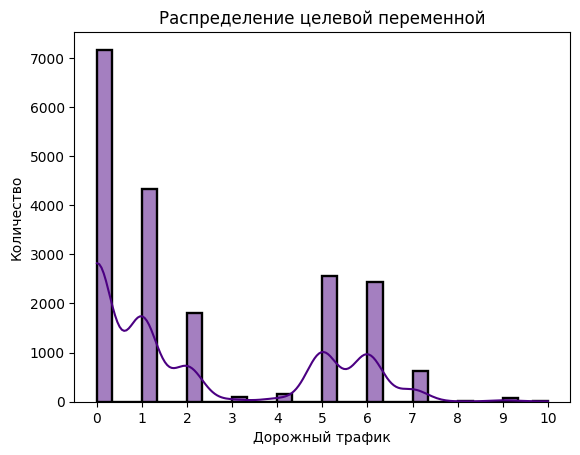

In [15]:
plt.figure()
sns.histplot(df['traf'],
             kde=True,
             bins=30,
             color='#4B0082',
             edgecolor='black', linewidth=1.7)

plt.title("Распределение целевой переменной")
plt.xlabel("Дорожный трафик")
plt.ylabel("Количество")
plt.xticks(np.arange(0, 11, 1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):d}'))
plt.show()

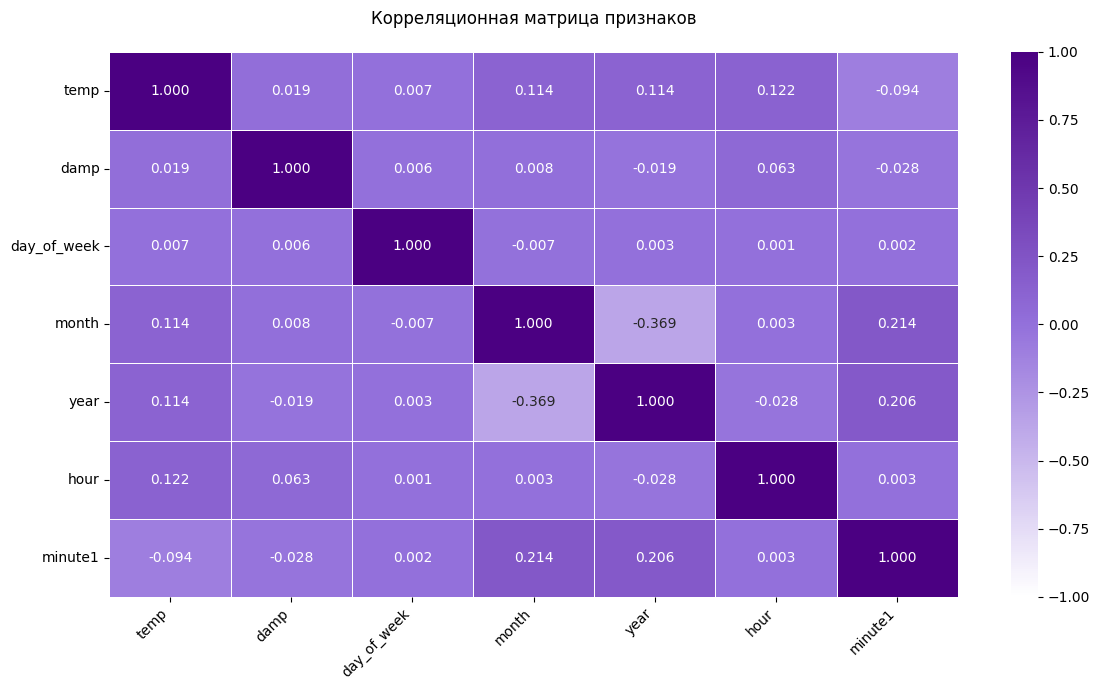

In [16]:
corr = X.corr()
colors = ['#ffffff', '#9370DB', '#4B0082']
my_cmap = LinearSegmentedColormap.from_list("my_palette", colors)
plt.figure(figsize=(11.9, 7))
sns.heatmap(
    corr,
    annot=True,
    cmap=my_cmap,
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    center=0,
    fmt=".3f"
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Корреляционная матрица признаков', pad=20)
plt.tight_layout()
plt.show()

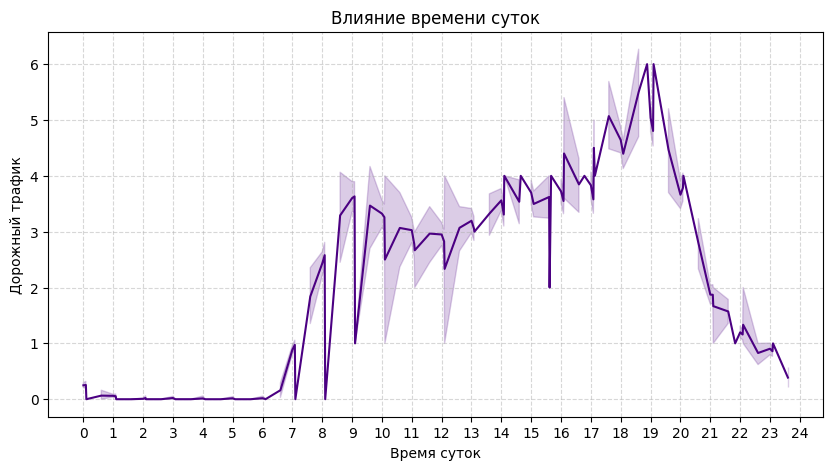

In [17]:
X['time_of_day'] = X['hour'] + X['minute1']/60
plt.figure(figsize=(10, 5))
sns.lineplot(x=X['time_of_day'], y=y, color='#4B0082', linewidth=1.5)
plt.title('Влияние времени суток')
plt.xlabel('Время суток')
plt.ylabel('Дорожный трафик')
plt.xticks(range(0,25,1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

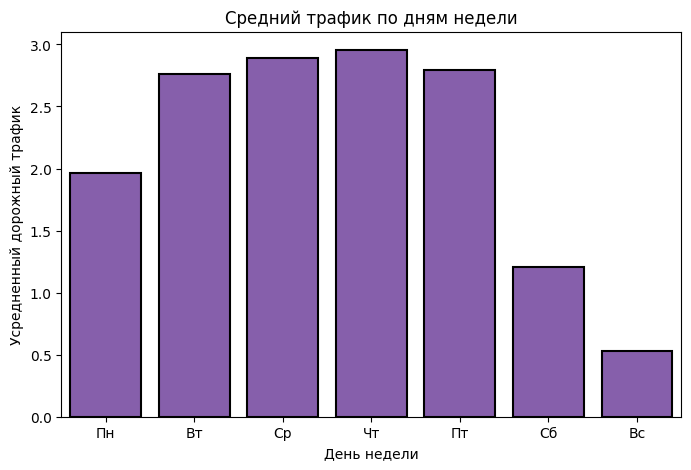

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['day_of_week'], y=y, color='#8752B8', edgecolor='black', linewidth=1.5,errorbar=None)
plt.title('Средний трафик по дням недели')
plt.xlabel('День недели')
plt.ylabel('Усредненный дорожный трафик')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

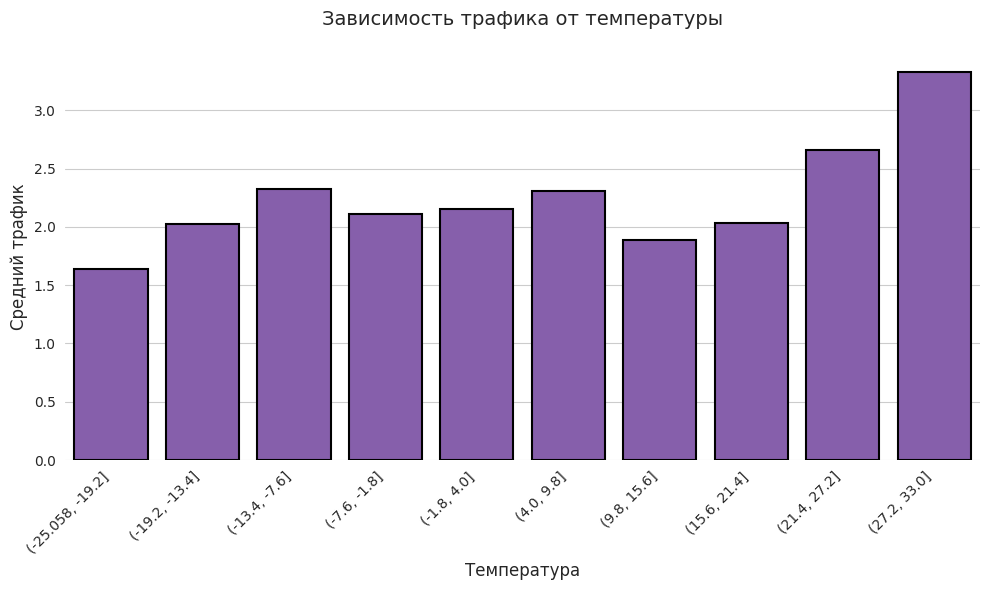

In [19]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
temp_bins = pd.cut(df['temp'], bins=10)
plot = sns.barplot(
        x=temp_bins,
        y=y,
        color='#8752B8',
        edgecolor='black',
        linewidth=1.5,
        errorbar=None
    )
plt.title('Зависимость трафика от температуры', pad=20, fontsize=14)
plt.xlabel('Температура', fontsize=12)
plt.ylabel('Средний трафик', fontsize=12)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

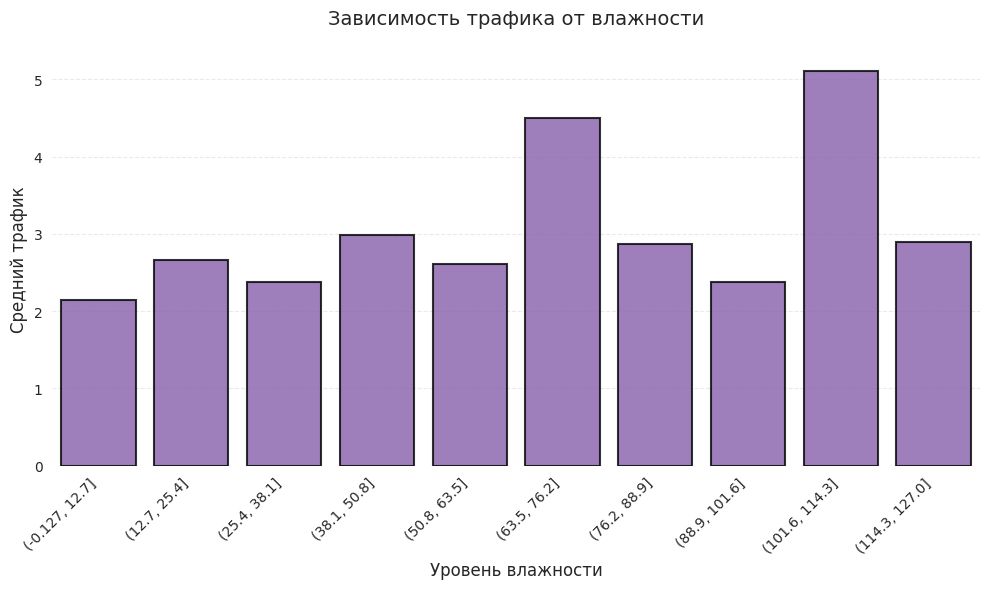

In [20]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
damp_bins = pd.cut(df['damp'], bins=10)
sns.barplot(
    x=damp_bins,
    y=y,
    color='#8752B8',
    edgecolor='black',
    linewidth=1.5,
    errorbar=None,
    alpha=0.8
)
plt.title('Зависимость трафика от влажности', pad=20, fontsize=14)
plt.xlabel('Уровень влажности', fontsize=12)
plt.ylabel('Средний трафик', fontsize=12)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

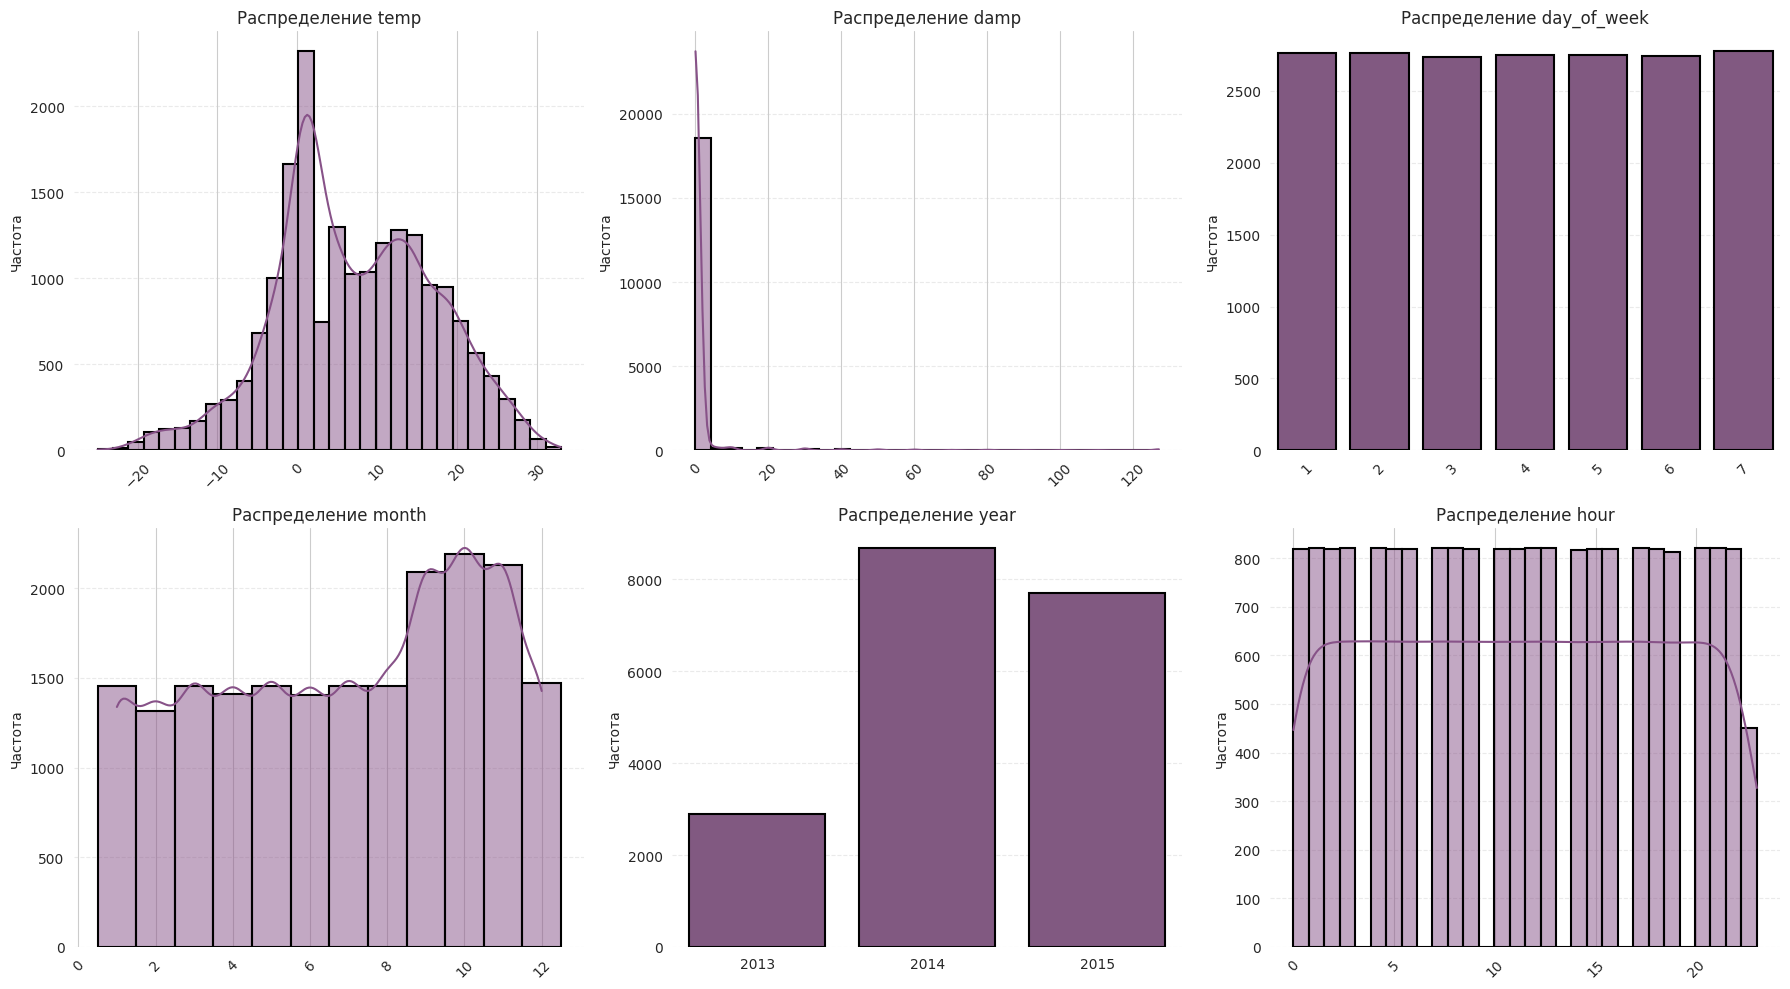

In [21]:
available_features = ['temp', 'damp', 'day_of_week', 'month', 'year', 'hour', 'minute', 'time_of_day']
features_to_plot = [f for f in available_features if f in df.columns]
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
colors = ['#875288', '#9370DB', '#4B0082']

n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols  # Округление вверх
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]

    # Для категориальных признаков
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:
        sns.countplot(
            x=df[feature],
            ax=ax,
            color=colors[0],
            edgecolor='black',
            linewidth=1.5
        )
    # Для числовых признаков
    else:
        sns.histplot(
            df[feature],
            ax=ax,
            color=colors[0],
            edgecolor='black',
            linewidth=1.5,
            kde=True,
            bins=30
        )
    ax.set_title(f'Распределение {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Частота' if df[feature].dtype != 'object' else 'Количество')
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    if len(df[feature].unique()) > 5:
        ax.tick_params(axis='x', rotation=45)

# Скрываем пустые subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

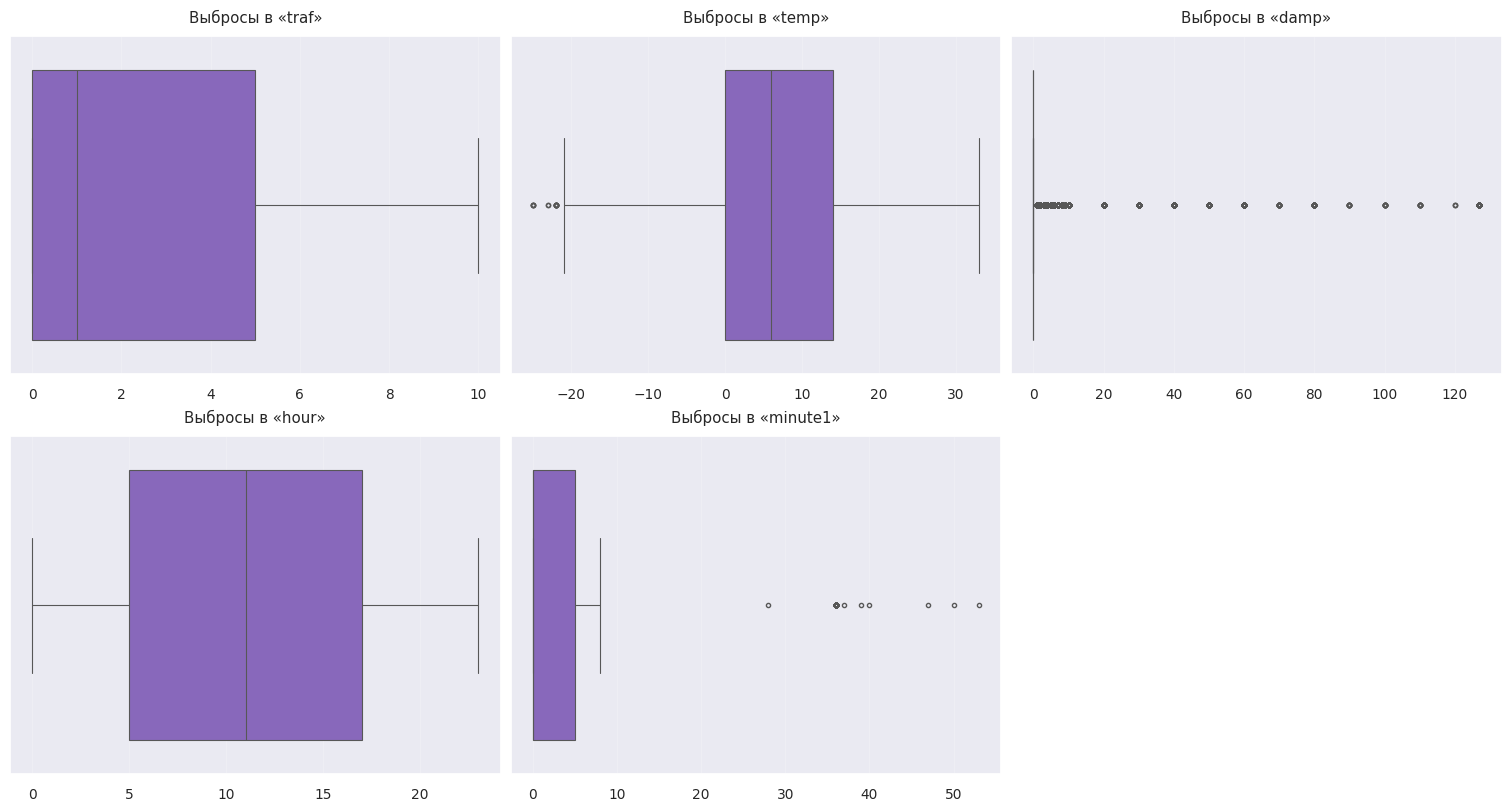

In [22]:
num_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()
my_cmap = LinearSegmentedColormap.from_list("my_palette",["#ffffff", "#9370DB", "#4B0082"])
plt.style.use("default")
sns.set(font_scale=0.9)
sns.set_palette([my_cmap(0.7)])
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5 * n_cols, 4 * n_rows),
                         constrained_layout=True)
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
for i, col in enumerate(num_cols):
    sns.boxplot(
        x=df[col],
        ax=axes[i],
        color=my_cmap(0.6),
        fliersize=3,
        linewidth=0.8
    )
    axes[i].set_title(f"Выбросы в «{col}»", pad=10)
    axes[i].set_xlabel("")
    axes[i].grid(axis="x", alpha=0.2)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

Не будем убирать выбросы, так как они содержат в себе информацию и являются вполне логичными, например, температура может быть отрицательной и при экстремальных морозах транспортная ситуация на дорогах может меняться.

# Обучим основные 'слабые' модели

In [23]:
df

,traf,temp,damp,day_of_week,month,year,hour,minute1
0,0,14,0,7,9,2013,0,0
1,0,14,0,7,9,2013,1,5
2,0,14,0,7,9,2013,2,5
3,0,13,0,7,9,2013,3,0
4,0,13,0,7,9,2013,4,5
...,...,...,...,...,...,...,...,...
19280,5,0,0,2,12,2015,10,36
19281,4,0,0,2,12,2015,11,36
19282,4,1,0,2,12,2015,12,36
19283,4,1,0,2,12,2015,13,36


In [24]:
#Преобразование категориальных признаков
categorical_cols = ['day_of_week', 'month']
X[categorical_cols] = X[categorical_cols].astype('category')
#One-Hot Encoding для категориальных признаков
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [25]:
X.dtypes

,0
temp,int64
damp,int64
year,category
hour,int32
minute1,int32
time_of_day,float64
day_of_week_2,bool
day_of_week_3,bool
day_of_week_4,bool
day_of_week_5,bool


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
models = {
    "Bayesian Ridge": BayesianRidge(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.7),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=0.1),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "KNN"        : KNeighborsRegressor(n_neighbors=5),
    # "SVM (Linear) C = 1": SVR(kernel='linear', C=1.0, epsilon=0.1),
    # "SVM (Linear) C = 10": SVR(kernel='linear', C=10.0, epsilon=0.1)
}
results1   = []
exec_time1 = []
for name, model in models.items():
    t0 = time.perf_counter()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    t1 = time.perf_counter()
    exec_time1.append(round(t1 - t0, 4))
    mae   = mean_absolute_error(y_test, y_pred)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    r2    = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    # значения ≤ 0 убираем (MSLE не принимает  нули и отрицательные значения)
    y_test_safe = np.maximum(0, y_test)
    y_pred_safe = np.maximum(0, y_pred)
    msle = mean_squared_log_error(y_test_safe, y_pred_safe)

    results1.append({
        "Model" : name,
        "MAE"   : round(mae, 3),
        "MSE"   : round(mse, 3),
        "RMSE"  : round(rmse, 3),
        "R2"    : round(r2, 3),
        "MedAE" : round(medae, 3),
        "MSLE"  : round(msle, 3) if not np.isnan(msle) else None,
        "Time"  : exec_time1[-1]
    })

In [27]:
results_df = pd.DataFrame(results1)
print("Результаты оценки моделей:")
print(results_df.to_string(index=False))

Результаты оценки моделей:
            Model   MAE   MSE  RMSE    R2  MedAE  MSLE   Time
   Bayesian Ridge 1.623 3.746 1.935 0.378  1.541 0.401 0.1279
       ElasticNet 1.719 4.173 2.043 0.307  1.483 0.424 0.2800
 Lasso Regression 1.727 4.200 2.049 0.303  1.479 0.427 0.0572
 Ridge Regression 1.623 3.746 1.936 0.378  1.540 0.402 0.0357
Linear Regression 1.623 3.746 1.936 0.378  1.540 0.402 0.0779
    Decision Tree 0.978 2.258 1.503 0.625  0.586 0.187 0.0931
              KNN 1.007 2.287 1.512 0.620  0.600 0.211 0.7747


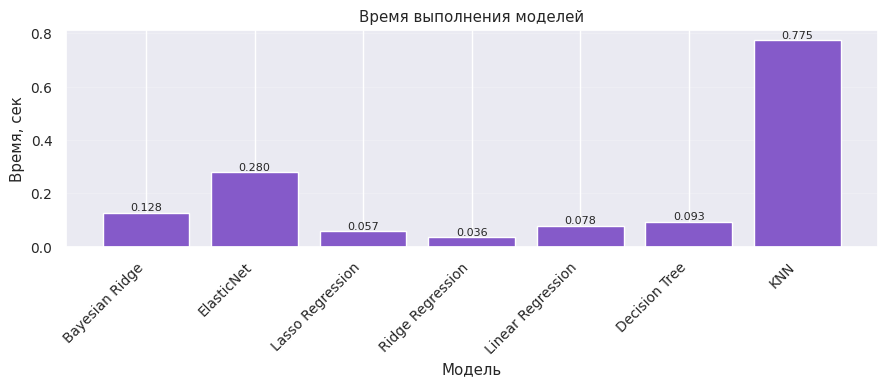

In [28]:
my_cmap = LinearSegmentedColormap.from_list("my_palette",
                                            ["#ffffff", "#9370DB", "#4B0082"])

plt.figure(figsize=(9, 4))
bars = plt.bar(results_df["Model"], results_df["Time"],
               color=[my_cmap(0.6)]*len(results_df))
plt.title("Время выполнения моделей")
plt.xlabel("Модель")
plt.ylabel("Время, сек")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.2)

for bar, t in zip(bars, exec_time1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{t:.3f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

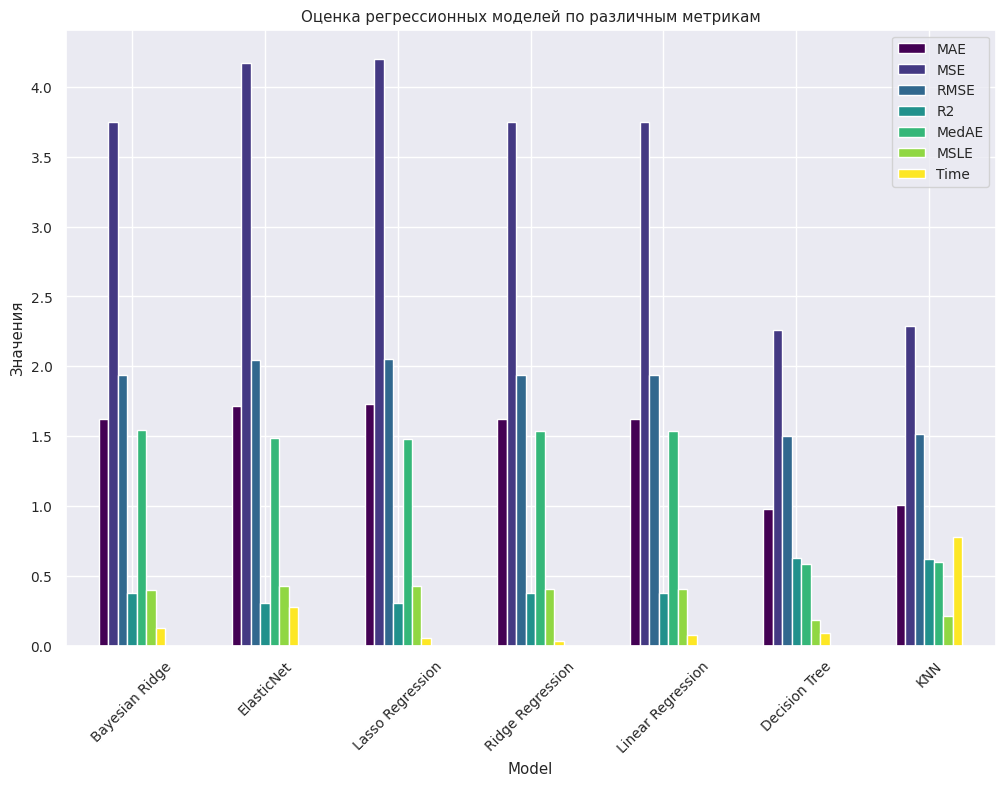

In [29]:
plt.figure(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Оценка регрессионных моделей по различным метрикам')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.show()

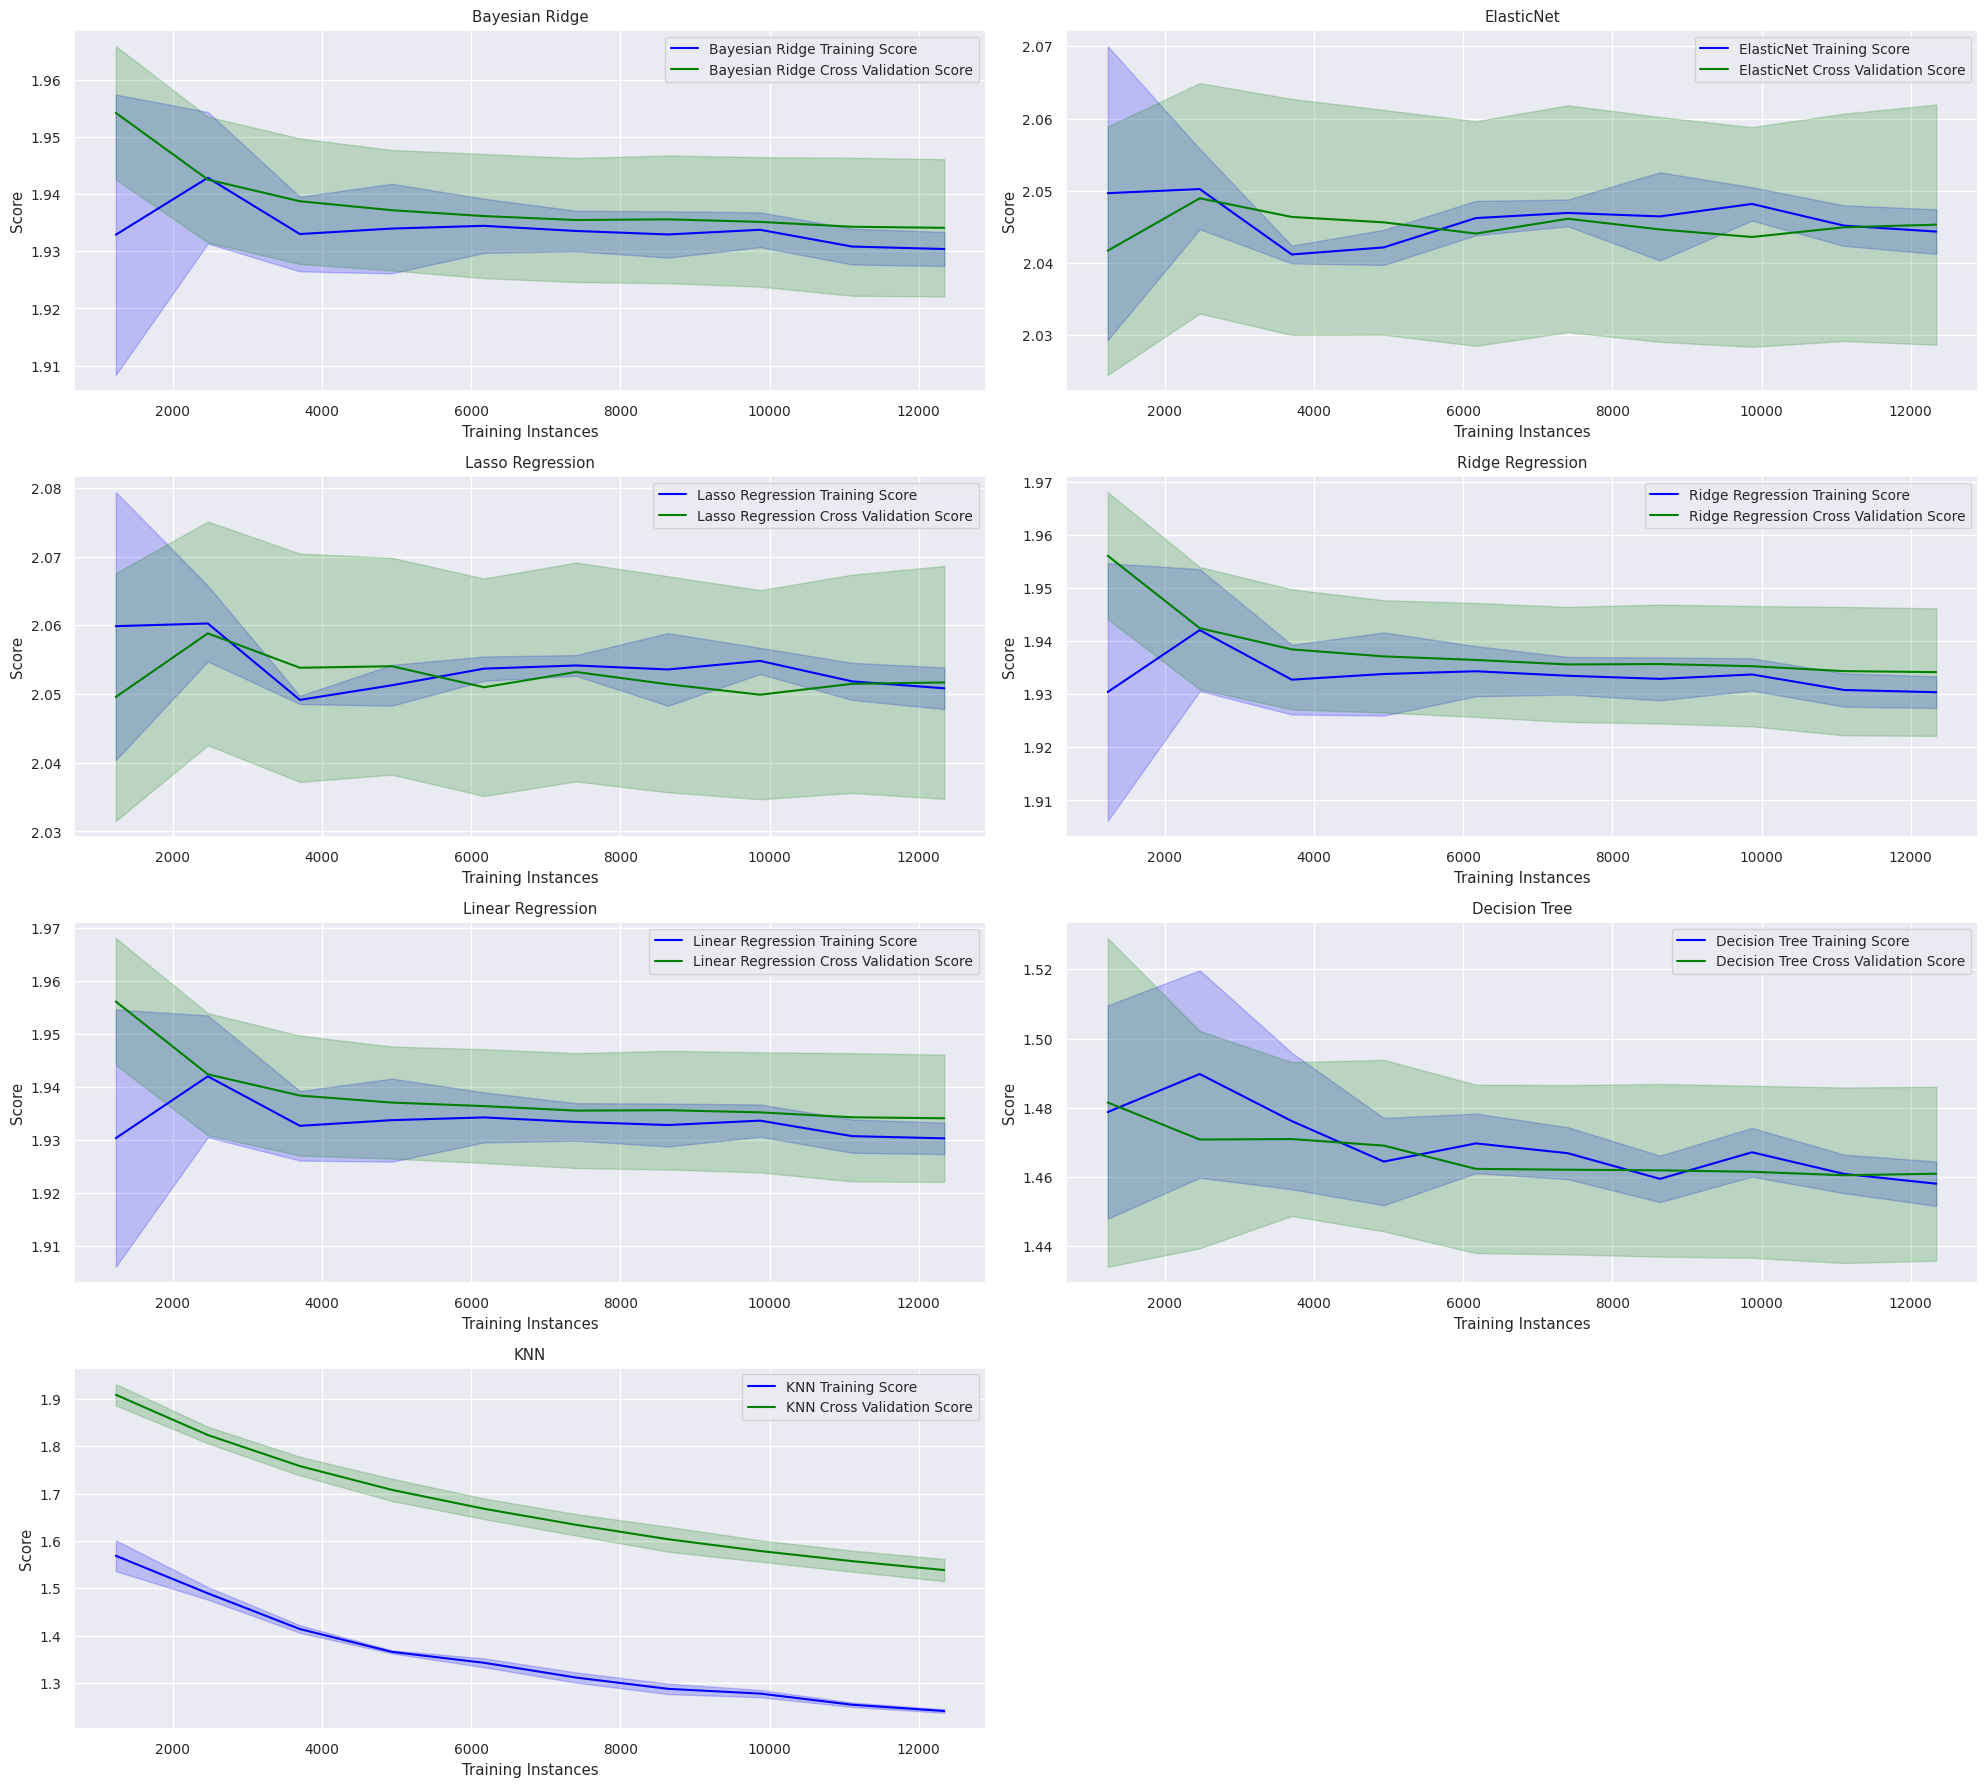

In [30]:
plt.figure(figsize=(20, 18))
for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_root_mean_squared_error')

    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    plt.subplot(4, 2, i+1)
    plt.plot(train_sizes, train_mean, label=f'{name} Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label=f'{name} Cross Validation Score', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

    plt.title(f'{name}')
    plt.xlabel('Training Instances')
    plt.ylabel('Score')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

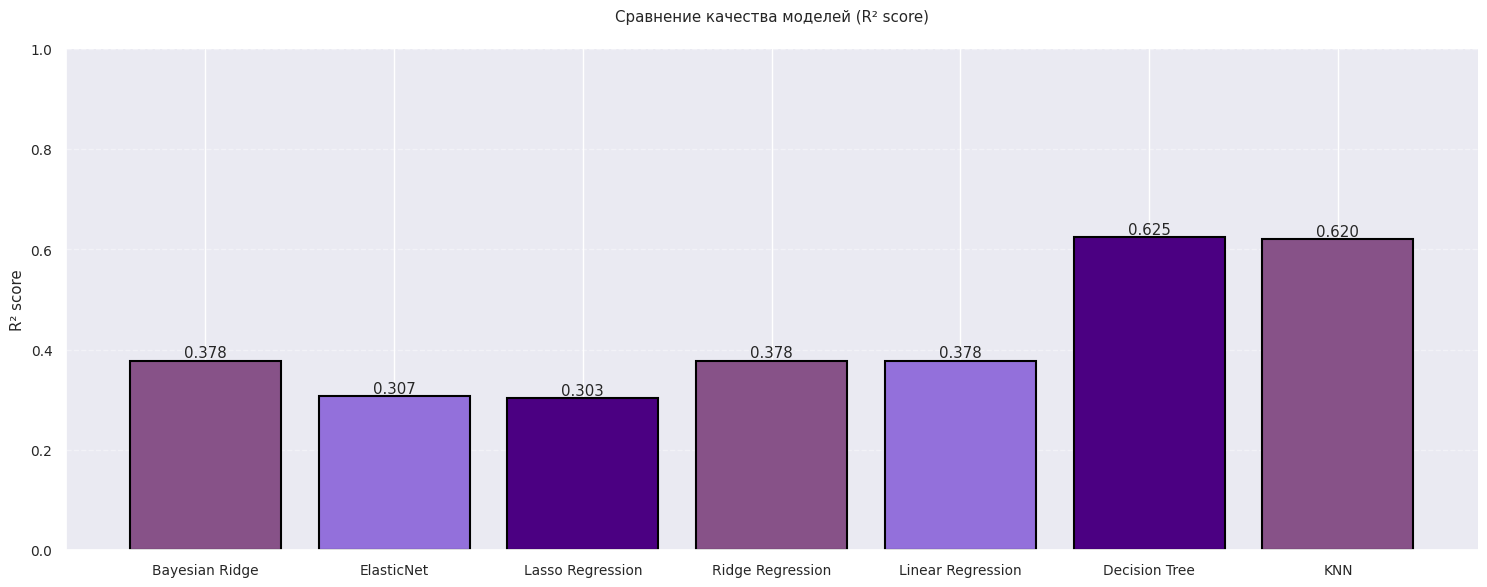

In [31]:
plt.figure(figsize=(15, 6))
models_names = results_df['Model'].values
r2_scores = results_df['R2'].values

bars = plt.bar(models_names, r2_scores, color=['#875288', '#9370DB', '#4B0082'],
               edgecolor='black', linewidth=1.5)

plt.title('Сравнение качества моделей (R² score)', pad=20)
plt.ylabel('R² score')
plt.ylim(0, 1)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# бэггинговые модели

Пусть дана обучающая выборка $X$. Далее генеируются выборки
$$
X_1,\; X_2,\; \dots,\; X_M.
$$  

На каждой подвыборке обучаем базовый алгоритм $$a_i(x)$$.  
Итоговый ансамблевый классификатор усредняет их ответы  
$$
a(x)=\frac{1}{M}\sum_{i=1}^{M} a_i(x).
$$  

Рассмотрим задачу регрессии с базовыми алгоритмами — $$b_1(x),\,b_2(x),\dots,b_n(x)$$,  
Предположим, что существует истинная функция ответа для всех объектов $y(x)$, а также задано распределение на объектах $p(x)$  
Ошибка $i$-й модели:

$$
\varepsilon_i(x)=b_i(x)-y(x), \qquad i=1,\dots,n.
$$  

Среднеквадратичное ожидание ошибки:

$$
\mathbb{E}_x\!\bigl[(b_i(x)-y(x))^{2}\bigr]=
\mathbb{E}_x\!\bigl[\varepsilon_i^{2}(x)\bigr].
$$  

Средняя ошибка по всем моделям:

$$
\mathbb{E}_1=\frac{1}{n}\,
\mathbb{E}_x\!\Bigl[\sum_{i=1}^{n}\varepsilon_i^{2}(x)\Bigr].
$$  

Предположим, что ошибки несмещённые и некоррелированы:

$$
\mathbb{E}_x[\varepsilon_i(x)]=0,\qquad
\mathbb{E}_x[\varepsilon_i(x)\,\varepsilon_j(x)]=0,\; i\neq j.
$$  

*Усреднённая функция*

Определим новую регрессионную функцию

$$
a(x)=\frac{1}{n}\sum_{i=1}^{n} b_i(x).
$$  

Её среднеквадратичная ошибка:

$$
\begin{aligned}
\mathbb{E}_n
&=\mathbb{E}_x\!\Bigl(\tfrac1n\sum_{i=1}^{n} b_i(x)-y(x)\Bigr)^2\\
&=\mathbb{E}_x\!\Bigl(\tfrac1n\sum_{i=1}^{n}\varepsilon_i(x)\Bigr)^2\\
&=\frac{1}{n^{2}}\,
\mathbb{E}_x\!\Bigl(\sum_{i=1}^{n}\varepsilon_i^{2}(x)
+\sum_{i\neq j}\varepsilon_i(x)\varepsilon_j(x)\Bigr)\\
&=\frac{1}{n}\,\mathbb{E}_1.
\end{aligned}
$$  

**Итого:** усреднение уменьшает MSE в $n$ раз.


Случайный лес является бэггингом со случайным выбором деревьев для построение, это является плюсом, так как:

Формально дисперсия ансамбля определяется:

$$
\operatorname{Var}\!\bigl(a(x)\bigr)=\rho\,\sigma^{2}+\frac{1-\rho}{M}\,\sigma^{2},
$$  

где $\rho$ — средняя корреляция между деревьями.  
Random Forest уменьшает $\rho$, поэтому итоговая дисперсия меньше, чем у чистого бэггинга при том же $M$.


Построим ансамбль алгоритмов, где базовый алгоритм — это решающее дерево. Будем строить по следующей схеме:

Для построения
i-го дерева:

Сначала, как в обычном бэггинге, из обучающей выборки
X выбирается с возвращением случайная подвыборка
$X^i$

  того же размера, что и
X.

В процессе обучения каждого дерева в каждой вершине случайно выбираются
n<N признаков, где
N — полное число признаков (метод случайных подпространств), и среди них ищется оптимальный сплит. Такой приём как раз позволяет управлять степенью скоррелированности базовых алгоритмов.

Чтобы получить предсказание ансамбля на тестовом объекте, усредняем отдельные ответы деревьев (для регрессии) или берём самый популярный класс (для классификации).
 Мы построили Random Forest (случайный лес) — комбинацию бэггинга и метода случайных подпространств над решающими деревьями.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, max_depth=10, n_jobs=-1, random_state=42
    ),
    "Extra Trees": ExtraTreesRegressor(
        n_estimators=300, max_depth=10, n_jobs=-1, random_state=42
    ),
    "Bagging (DT)": BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
        n_estimators=300,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ),
}

In [ ]:
results2   = []
exec_time2 = []
feature_importances = []

for name, model in models.items():
    t0 = time.perf_counter()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    t1 = time.perf_counter()
    exec_time2.append(round(t1 - t0, 4))
    mae   = mean_absolute_error(y_test, y_pred)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    r2    = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    results2.append({
        "Model": name,
        "MAE":   mae,
        "MSE":   mse,
        "RMSE":  rmse,
        "R2":    r2,
        "MedAE": medae,
        "Time":  exec_time2[-1]
    })

    # сохраняем важности признаков, если они есть
    if hasattr(model, "feature_importances_"):
        fi = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_,
            "Model": name
        })
        feature_importances.append(fi)

results_df = pd.DataFrame(results2)
feature_importances = (pd.concat(feature_importances, ignore_index=True)
                       if feature_importances else None)

In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2,MedAE,Time
0,Random Forest,0.782245,1.583336,1.258307,0.737097,0.410000,6.1463
1,Extra Trees,0.789136,1.571930,1.253766,0.738991,0.411458,6.9425
2,Bagging (DT),0.782219,1.583356,1.258315,0.737094,0.409715,7.1489


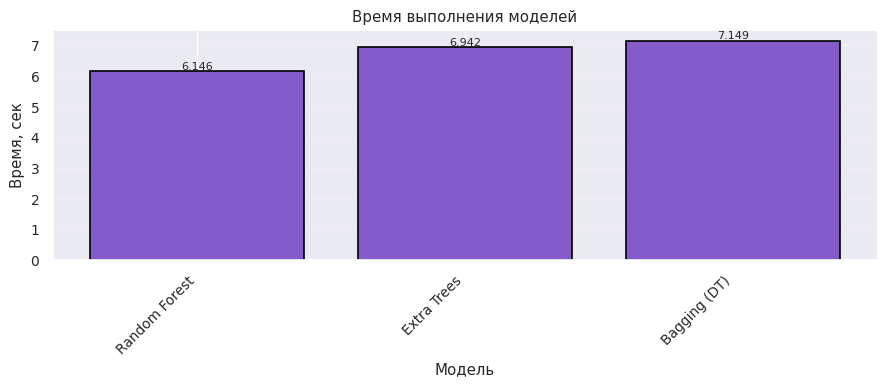

In [ ]:
my_cmap = LinearSegmentedColormap.from_list(
    "my_palette", ["#ffffff", "#9370DB", "#4B0082"]
)

plt.figure(figsize=(9, 4))
bars = plt.bar(results_df["Model"], results_df["Time"],
               color=[my_cmap(0.6)] * len(results_df),
               edgecolor='black', linewidth=1.2)

plt.title("Время выполнения моделей")
plt.xlabel("Модель")
plt.ylabel("Время, сек")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.2)

for bar, t in zip(bars, exec_time2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{t:.3f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

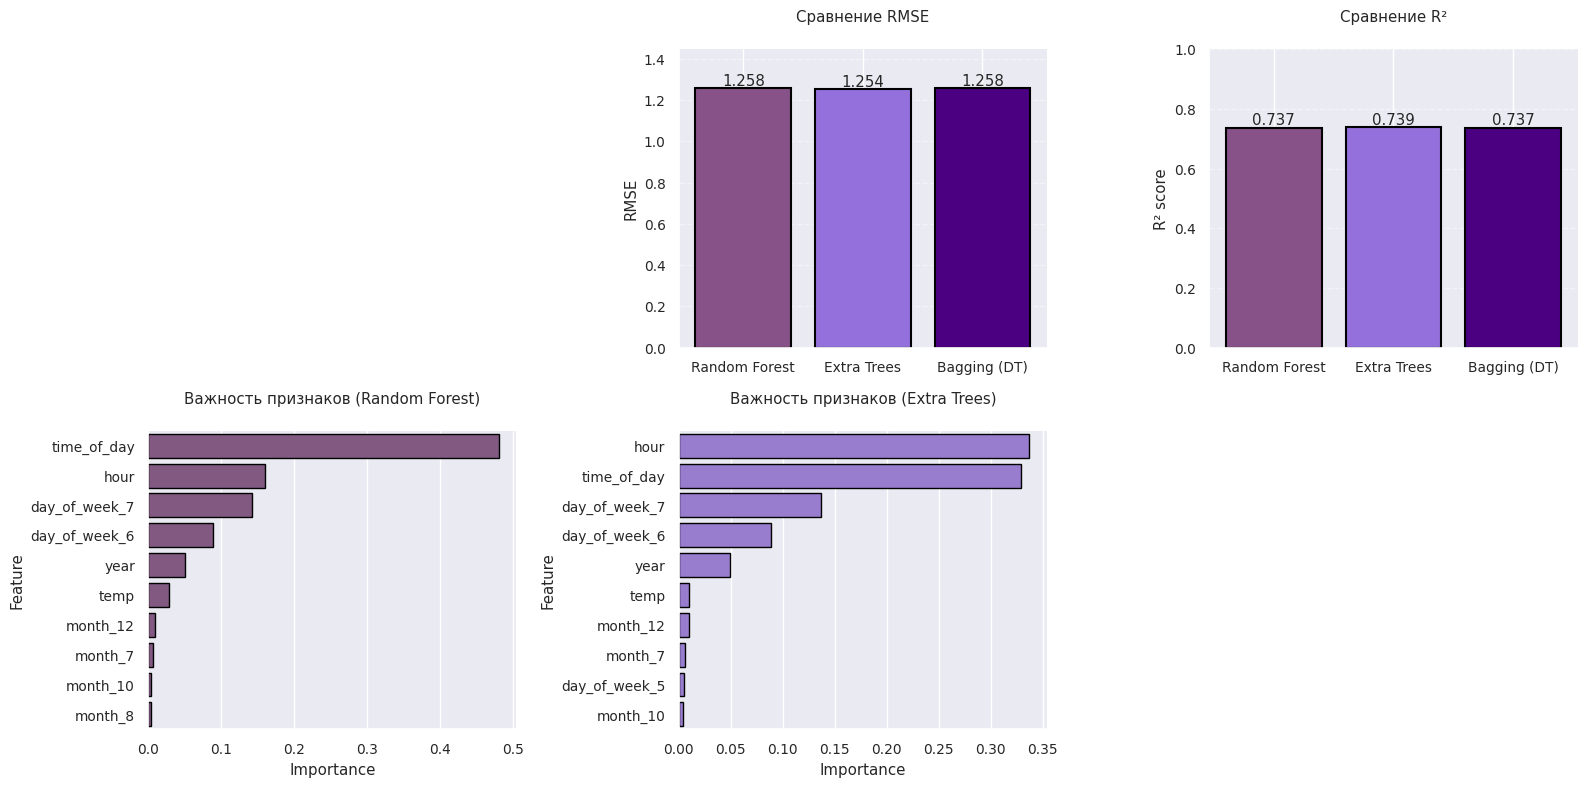

In [ ]:
hex_colors = ['#875288', '#9370DB', '#4B0082', '#6A5ACD', '#483D8B']          # хватит на 5 моделей
palette    = dict(zip(results_df['Model'], hex_colors[:len(results_df)]))
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 2)
bars = plt.bar(results_df['Model'], results_df['RMSE'],
               color=[palette[m] for m in results_df['Model']],
               edgecolor='black', linewidth=1.5)

plt.title('Сравнение RMSE', pad=20)
plt.ylabel('RMSE')
plt.ylim(0, results_df['RMSE'].max()*1.15)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h,
             f'{h:.3f}', ha='center', va='bottom')

plt.subplot(2, 3, 3)
bars_r2 = plt.bar(results_df['Model'], results_df['R2'],
                  color=[palette[m] for m in results_df['Model']],
                  edgecolor='black', linewidth=1.5)

plt.title('Сравнение R²', pad=20)
plt.ylabel('R² score')
plt.ylim(0, 1)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars_r2:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h,
             f'{h:.3f}', ha='center', va='bottom')

plt.subplot(2, 3, 4)
rf_imp = (feature_importances[feature_importances['Model'] == 'Random Forest']
          .sort_values('Importance', ascending=False)
          .head(10))

sns.barplot(x='Importance', y='Feature', data=rf_imp,
            color=palette['Random Forest'],
            edgecolor='black', linewidth=1)
plt.title('Важность признаков (Random Forest)', pad=20)
sns.despine()
plt.subplot(2, 3, 5)
et_imp = (feature_importances[feature_importances['Model'] == 'Extra Trees']
          .sort_values('Importance', ascending=False)
          .head(10))
sns.barplot(x='Importance', y='Feature', data=et_imp,
            color=palette['Extra Trees'],
            edgecolor='black', linewidth=1)
plt.title('Важность признаков (Extra Trees)', pad=20)
sns.despine()

plt.tight_layout()
plt.show()

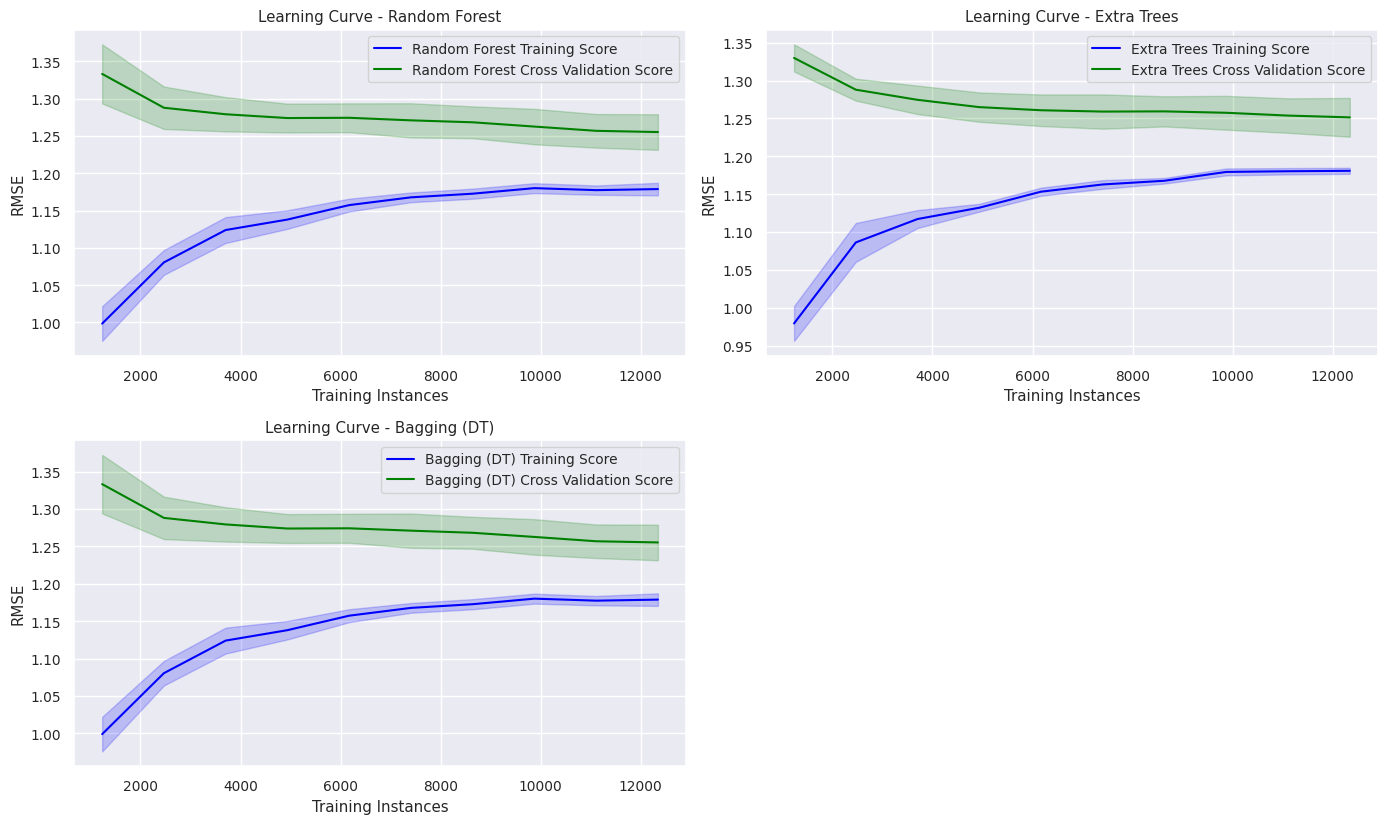

In [ ]:
plt.figure(figsize=(14, 12))
for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_root_mean_squared_error'
    )
    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)
    plt.subplot(3, 2, i+1)
    plt.plot(train_sizes, train_mean, label=f'{name} Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label=f'{name} Cross Validation Score', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Instances')
    plt.ylabel('RMSE')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Рассмотрим несколько основынх бустингов

In [ ]:
cat_cols = ['day_of_week', 'month', 'year']
target   = 'traf'
num_cols = df.columns.difference(cat_cols + [target])

X = df[cat_cols + list(num_cols)].copy()
y = df[target]
for c in cat_cols:
    X[c] = X[c].astype('category')
X_enc = X.copy()
for c in cat_cols:
    X_enc[c] = X_enc[c].cat.codes
X_train, X_test, y_train, y_test   = train_test_split(
    X,      y, test_size=0.2, random_state=42, shuffle=True)
Xtr_enc, Xte_enc, _, _             = train_test_split(
    X_enc,  y, test_size=0.2, random_state=42, shuffle=True)

cat_idx = [X_train.columns.get_loc(c) for c in cat_cols]   # CatBoost

In [ ]:
models = {
    "LightGBM": LGBMRegressor(
        n_estimators=600, max_depth=-1, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=42),

    "XGBoost": XGBRegressor(
        n_estimators=600, max_depth=8, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, tree_method="hist",
        enable_categorical=True, random_state=42),

    "CatBoost": CatBoostRegressor(
        iterations=600, depth=8, learning_rate=0.05,
        subsample=0.8, loss_function="RMSE",
        random_seed=42, verbose=False),

    "AdaBoost": AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=6),
        n_estimators=400, learning_rate=0.05, random_state=42),

    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=400, max_depth=3, learning_rate=0.05,
        subsample=0.8, random_state=42),

    "HistGradientBoosting": HistGradientBoostingRegressor(
        max_depth=None, learning_rate=0.05, max_iter=400,
        l2_regularization=0.0, random_state=42)
}
fit_cols = {
    "LightGBM":             X_train.columns,
    "XGBoost":              X_train.columns,
    "CatBoost":             X_train.columns,
    "AdaBoost":             Xtr_enc.columns,
    "GradientBoosting":     Xtr_enc.columns,
    "HistGradientBoosting": None           # нет feature_importances_
}

In [ ]:
results3, feature_importances = [], []

for name, model in models.items():
    t0 = time.perf_counter()
    if name in ["AdaBoost", "GradientBoosting", "HistGradientBoosting"]:
        model.fit(Xtr_enc, y_train)
        y_pred = model.predict(Xte_enc)
    elif name == "LightGBM":
        model.fit(X_train, y_train, categorical_feature=cat_cols)
        y_pred = model.predict(X_test)
    elif name == "CatBoost":
        model.fit(X_train, y_train, cat_features=cat_idx)
        y_pred = model.predict(X_test)
    else:                      # XGBoost
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    exec_time3 = round(time.perf_counter() - t0, 4)

    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results3.append({
        "Model": name,
        "MAE":   mean_absolute_error(y_test, y_pred),
        "MSE":   mse,
        "RMSE":  rmse,
        "R2":    r2_score(y_test, y_pred),
        "MedAE": median_absolute_error(y_test, y_pred),
        "Time":  exec_time3
    })
    fi_vals = None
    if hasattr(model, "feature_importances_"):
        fi_vals = model.feature_importances_
    elif name == "CatBoost":
        fi_vals = model.get_feature_importance(type="FeatureImportance")

    cols = fit_cols[name]
    if fi_vals is not None and cols is not None and len(fi_vals) == len(cols):
        feature_importances.append(pd.DataFrame({
            "Feature": cols,
            "Importance": fi_vals,
            "Model": name
        }))

results_df = pd.DataFrame(results3).sort_values("RMSE")

if feature_importances:
    feature_importances = pd.concat(feature_importances, ignore_index=True)
else:
    feature_importances = pd.DataFrame(columns=["Feature", "Importance", "Model"])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 7
[LightGBM] [Info] Start training from score 2.166840


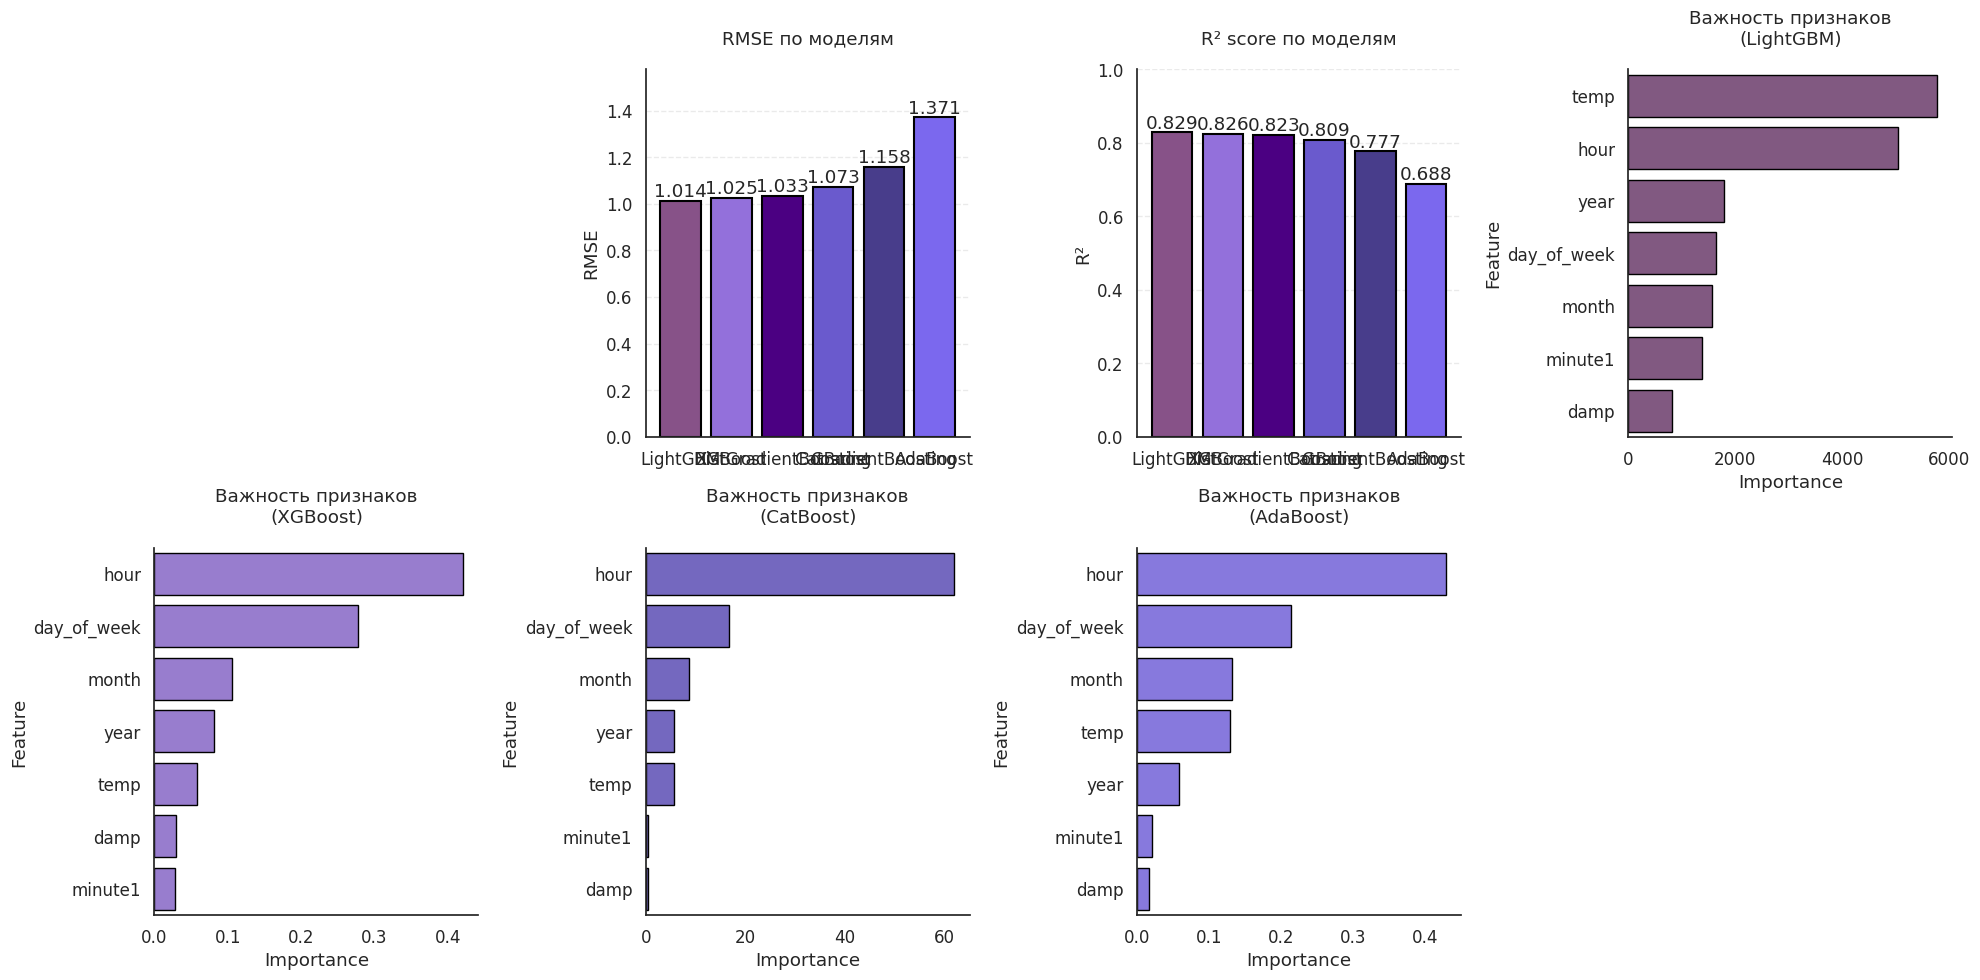

In [ ]:
unique_models = results_df['Model'].unique()
hex_colors = ['#875288', '#9370DB', '#4B0082', '#6A5ACD',
              '#483D8B', '#7B68EE', '#9A32CD', '#6959CD',
              '#8A2BE2', '#7F38EC']
palette = {m: hex_colors[i % len(hex_colors)] for i, m in enumerate(unique_models)}

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 2)
bars = plt.bar(results_df['Model'],
               results_df['RMSE'],
               color=[palette.get(m, '#333333') for m in results_df['Model']],
               edgecolor='black', linewidth=1.5)

plt.title('RMSE по моделям', pad=18)
plt.ylabel('RMSE')
plt.ylim(0, results_df['RMSE'].max()*1.15)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h,
             f'{h:.3f}', ha='center', va='bottom')

plt.subplot(2, 4, 3)
bars_r2 = plt.bar(results_df['Model'],
                  results_df['R2'],
                  color=[palette.get(m, '#333333') for m in results_df['Model']],
                  edgecolor='black', linewidth=1.5)

plt.title('R² score по моделям', pad=18)
plt.ylabel('R²')
plt.ylim(0, 1)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
for bar in bars_r2:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h,
             f'{h:.3f}', ha='center', va='bottom')

fi_models = feature_importances['Model'].unique()
for i, m in enumerate(fi_models[:4], start=4):
    plt.subplot(2, 4, i)
    fi = (feature_importances.query("Model == @m")
          .sort_values('Importance', ascending=False)
          .head(10))
    sns.barplot(x='Importance', y='Feature', data=fi,
                color=palette.get(m, '#333333'),
                edgecolor='black', linewidth=1)
    plt.title(f'Важность признаков\n({m})', pad=18)
    sns.despine()

plt.tight_layout()
plt.show()

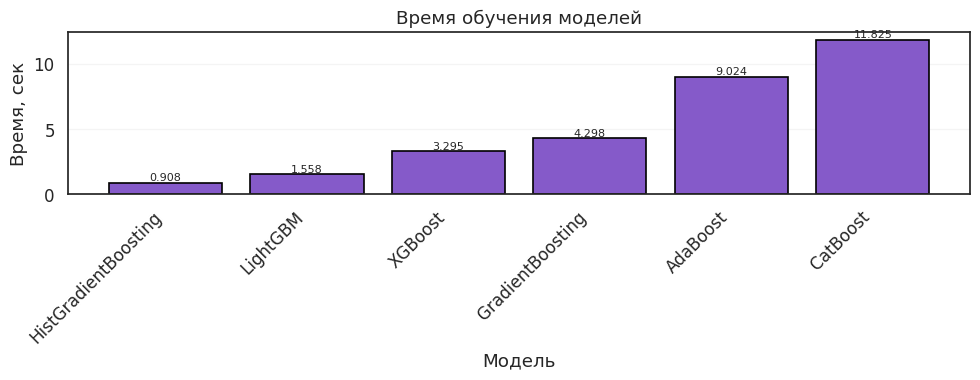

In [ ]:
my_cmap = LinearSegmentedColormap.from_list(
    "my_palette", ["#ffffff", "#9370DB", "#4B0082"]
)
time_df = results_df.sort_values("Time", ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 4))
bars = plt.bar(time_df["Model"], time_df["Time"],
               color=[my_cmap(0.6)] * len(time_df),
               edgecolor='black', linewidth=1.2)

plt.title("Время обучения моделей")
plt.xlabel("Модель")
plt.ylabel("Время, сек")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.2)
for bar, t in zip(bars, time_df["Time"]):
    plt.text(bar.get_x() + bar.get_width() / 2, t,
             f"{t:.3f}", ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:71: FutureWarning: `fit_params` is deprecated and will be removed in version {version}. Pass parameters via `params` instead.
  warnings.warn(


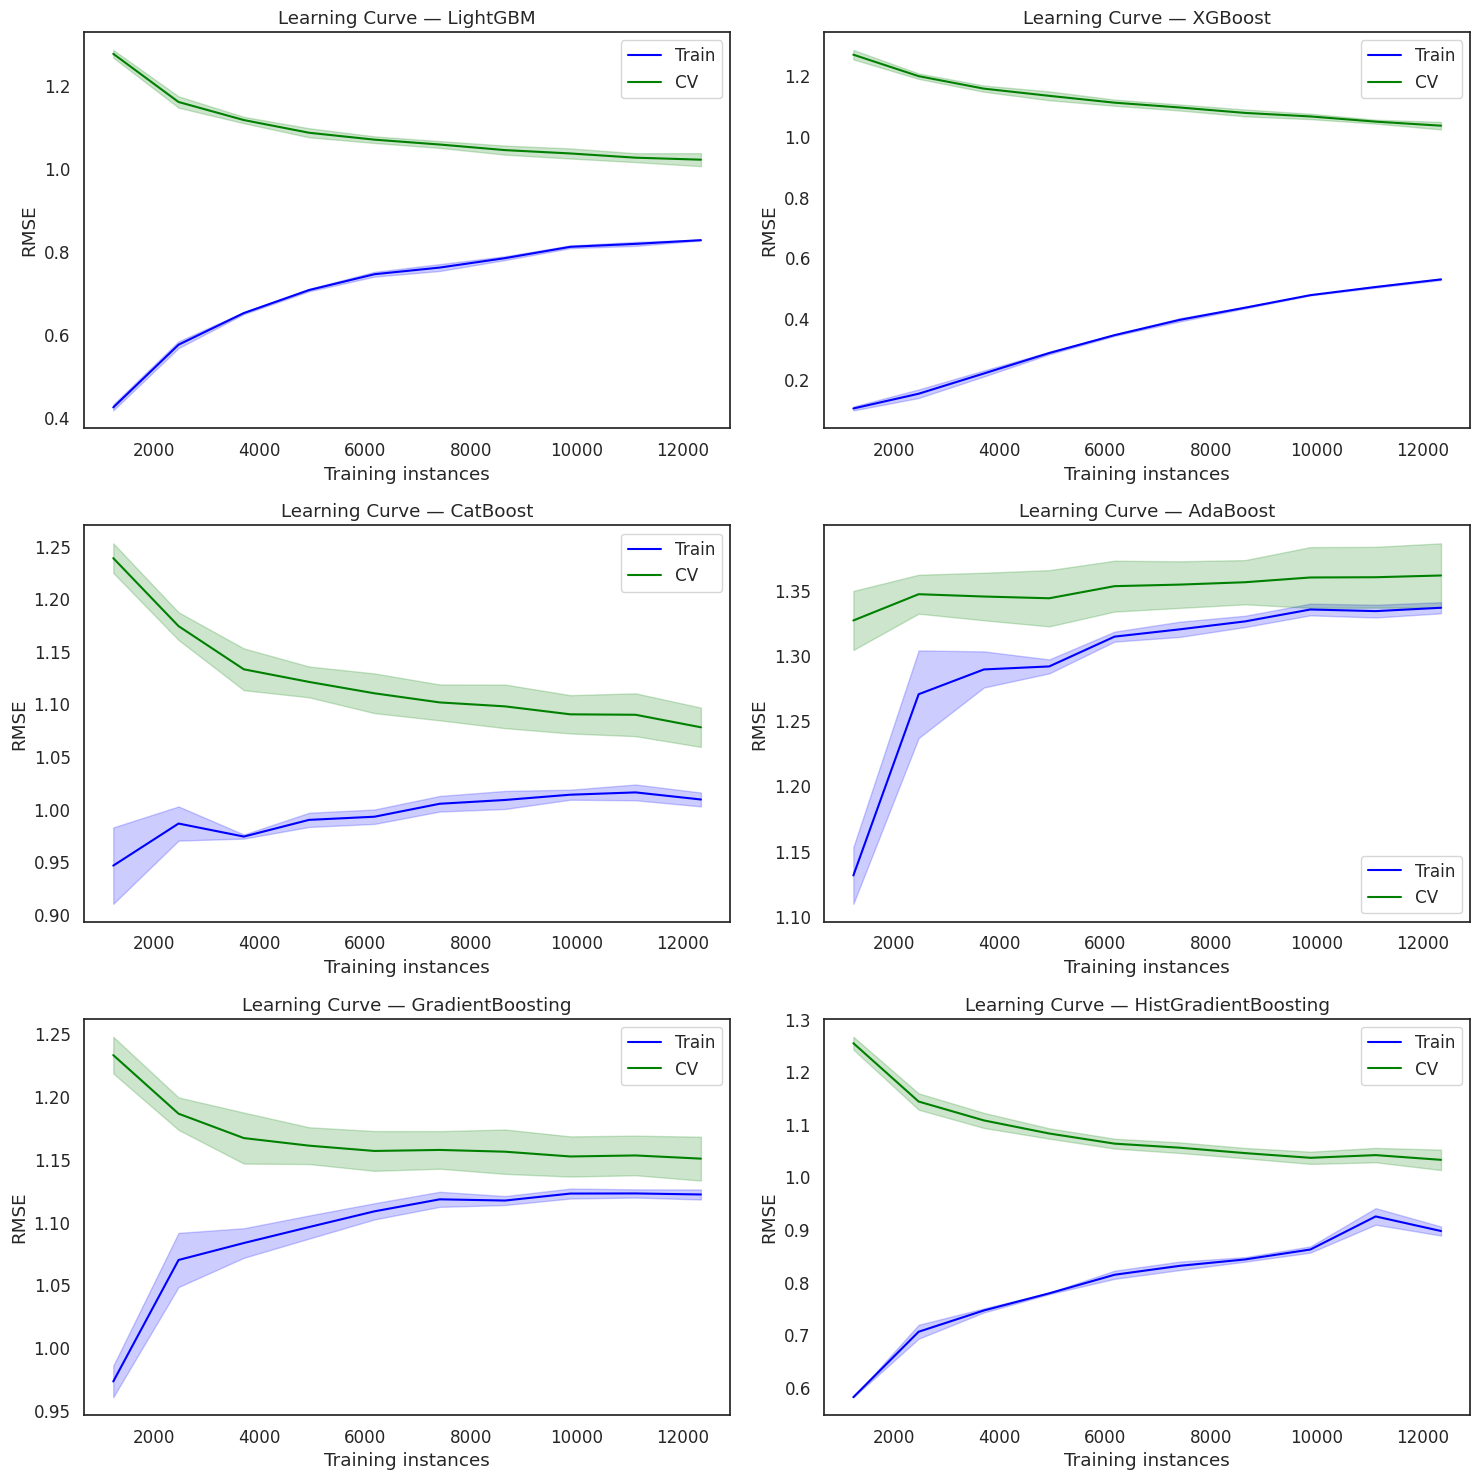

In [ ]:
encoded_models = {"AdaBoost", "GradientBoosting", "HistGradientBoosting"}
fit_params_map = {
    "LightGBM":  {"categorical_feature": cat_cols},
    "CatBoost":  {"cat_features": cat_idx},
    "XGBoost":   {},
    "AdaBoost":  {},
    "GradientBoosting": {},
    "HistGradientBoosting": {}
}

n_models = len(models)
n_cols   = 2
n_rows   = (n_models + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, (name, base_model) in enumerate(models.items(), start=1):
    if name in encoded_models:
        X_use, y_use = Xtr_enc, y_train
    else:
        X_use, y_use = X_train, y_train
    fit_params = fit_params_map[name]
    train_sizes, train_scores, test_scores = learning_curve(
        base_model, X_use, y_use,
        cv=5, scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1, fit_params=fit_params
    )
    train_mean = -train_scores.mean(axis=1)
    test_mean  = -test_scores.mean(axis=1)
    train_std  =  train_scores.std(axis=1)
    test_std   =  test_scores.std(axis=1)

    plt.subplot(n_rows, n_cols, i)
    plt.plot(train_sizes, train_mean, label='Train', color='blue')
    plt.plot(train_sizes, test_mean,  label='CV',    color='green')
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean  - test_std,
                     test_mean  + test_std,  alpha=0.2, color='green')

    plt.title(f'Learning Curve — {name}')
    plt.xlabel('Training instances')
    plt.ylabel('RMSE')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()


Попробуем оптимизировать гиперпараметры  лучшего бустинга **lightgbm**

In [ ]:
t_total_start = time.perf_counter()

def objective(trial):
    params = {
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),

        # убираем все сообщения LightGBM:
        # verbosity <= 0 выводит только FATAL/ERROR
        "verbosity": -1,

        "random_state": 42,
        "n_jobs": -1,
    }
    model = LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        categorical_feature=cat_cols
    )
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

t_opt_end = time.perf_counter()
opt_time = round(t_opt_end - t_total_start, 4)

best_params = study.best_params
best_params["verbosity"] = -1
best_model = LGBMRegressor(**best_params)

t_final_start = time.perf_counter()
best_model.fit(
    X_train, y_train,
    categorical_feature=cat_cols
)
t_final_end = time.perf_counter()
final_train_time = round(t_final_end - t_final_start, 4)

total_time = round(t_final_end - t_total_start, 4)

# Предсказание и расчёт метрик
final_preds = best_model.predict(X_test)
mse   = mean_squared_error(y_test, final_preds)
rmse  = np.sqrt(mse)
metrics = {
    "MAE":   mean_absolute_error(y_test, final_preds),
    "MSE":   mse,
    "RMSE":  rmse,
    "R2":    r2_score(y_test, final_preds),
    "MedAE": median_absolute_error(y_test, final_preds),
    "Opt Time (s)": opt_time,
    "Final Train Time (s)": final_train_time,
    "Total Time (s)": total_time
}
results_series = pd.Series(metrics, name="LightGBM (Optuna)")
print(study)
print("\nФинальные метрики и время:")
print(results_series)


[I 2025-04-29 10:37:10,121] A new study created in memory with name: no-name-1b9044e7-eb24-45b9-8e89-a2fe9f64608e
<ipython-input-20-cbce7351fef9>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 1e-1),
[I 2025-04-29 10:37:11,640] Trial 0 finished with value: 1.7775571539859945 and parameters: {'num_leaves': 140, 'max_depth': 6, 'learning_rate': 0.0010510231006948432, 'n_estimators': 740, 'min_child_samples': 25, 'subsample': 0.9100788874076493, 'colsample_bytree': 0.6475072528126526}. Best is trial 0 with value: 1.7775571539859945.
<ipython-input-20-cbce7351fef9>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins


Финальные метрики и время:
MAE                      0.622216
MSE                      1.009622
RMSE                     1.004800
R2                       0.832359
MedAE                    0.322322
Opt Time (s)            62.394300
Final Train Time (s)     1.074300
Total Time (s)          63.469100
Name: LightGBM (Optuna), dtype: float64


# Стекинг

Model    Stacking (classic)
MAE                0.580751
MSE                1.046508
RMSE                1.02299
R2                 0.826234
MedAE               0.31464
Time               344.9246
dtype: object


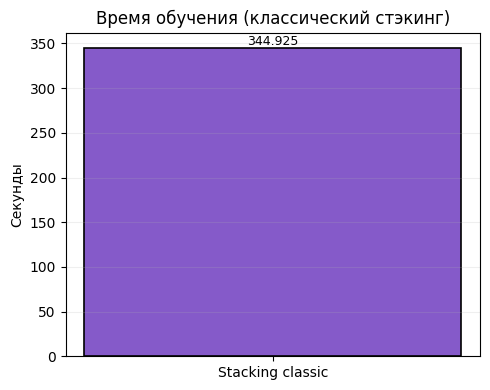

In [ ]:
cat_cols = ['day_of_week', 'month', 'year']
target   = 'traf'
num_cols = df.columns.difference(cat_cols + [target])

X_num = df[num_cols]
X_cat = pd.get_dummies(df[cat_cols].astype('category'), drop_first=False)
X     = pd.concat([X_num, X_cat], axis=1)
y     = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# БАЗОВЫЕ МОДЕЛИ
base_estimators = [
    ("rf",  RandomForestRegressor(
        n_estimators=400, max_depth=None, n_jobs=-1, random_state=42)),
    ("et",  ExtraTreesRegressor(
        n_estimators=400, max_depth=None, n_jobs=-1, random_state=42)),
    ("knn", make_pipeline(
        StandardScaler(with_mean=False),          # sparse-friendly
        KNeighborsRegressor(n_neighbors=10, weights='distance'))),
    ("svr", make_pipeline(
        StandardScaler(with_mean=False),
        SVR(C=50, gamma=0.1, epsilon=0.2)))
]
meta_model = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)

stack_cls = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

t0 = time.perf_counter()
stack_cls.fit(X_train, y_train)
train_time = round(time.perf_counter() - t0, 4)

y_pred = stack_cls.predict(X_test)

metrics = {
    "Model": "Stacking (classic)",
    "MAE":   mean_absolute_error(y_test, y_pred),
    "MSE":   mean_squared_error(y_test, y_pred),
    "RMSE":  np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2":    r2_score(y_test, y_pred),
    "MedAE": median_absolute_error(y_test, y_pred),
    "Time":  train_time
}

print(pd.Series(metrics))

In [ ]:
my_cmap = LinearSegmentedColormap.from_list(
    "my_palette", ["#ffffff", "#9370DB", "#4B0082"])

plt.figure(figsize=(5, 4))
bars = plt.bar(["Stacking classic"], [train_time],
               color=[my_cmap(0.6)], edgecolor='black', linewidth=1.2)

plt.title("Время обучения (классический стэкинг)")
plt.ylabel("Секунды")
plt.grid(axis='y', alpha=0.2)
plt.text(bars[0].get_x() + bars[0].get_width()/2, train_time,
         f"{train_time:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Model    Stacking (boostings)
MAE                  0.600652
MSE                  1.056966
RMSE                 1.028089
R2                   0.824498
MedAE                 0.30488
Time                  77.6366
dtype: object


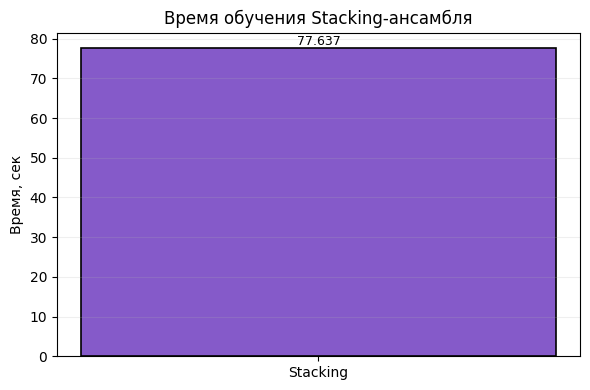

In [ ]:
cat_cols = ['day_of_week', 'month', 'year']
target   = 'traf'
num_cols = df.columns.difference(cat_cols + [target])

X_enc = df[cat_cols + list(num_cols)].copy()
for c in cat_cols:
    X_enc[c] = X_enc[c].astype('category').cat.codes
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42, shuffle=True
)
base_estimators = [
    ("lgbm", LGBMRegressor(
        n_estimators=600, max_depth=-1, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=42)),
    ("xgb", XGBRegressor(
        n_estimators=600, max_depth=8, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, tree_method="hist",
        enable_categorical=False, random_state=42)),
    ("gbr", GradientBoostingRegressor(
        n_estimators=400, max_depth=3, learning_rate=0.05,
        subsample=0.8, random_state=42)),
    ("ada", AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=6),
        n_estimators=400, learning_rate=0.05, random_state=42))
]

meta_model = HistGradientBoostingRegressor(
    max_depth=None, learning_rate=0.05, max_iter=400,
    l2_regularization=0.0, random_state=42
)

stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

t0 = time.perf_counter()
stack.fit(X_train, y_train)
train_time = round(time.perf_counter() - t0, 4)

y_pred = stack.predict(X_test)

metrics = {
    "Model": "Stacking (boostings)",
    "MAE":   mean_absolute_error(y_test, y_pred),
    "MSE":   mean_squared_error(y_test, y_pred),
    "RMSE":  np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2":    r2_score(y_test, y_pred),
    "MedAE": median_absolute_error(y_test, y_pred),
    "Time":  train_time
}

In [ ]:
pd.Series(metrics)

,0
Model,Stacking (boostings)
MAE,0.600652
MSE,1.056966
RMSE,1.028089
R2,0.824498
MedAE,0.30488
Time,77.6366


In [ ]:
my_cmap = LinearSegmentedColormap.from_list(
    "my_palette", ["#ffffff", "#9370DB", "#4B0082"]
)
plt.figure(figsize=(6, 4))
bars = plt.bar(["Stacking"], [train_time],
               color=[my_cmap(0.6)], edgecolor='black', linewidth=1.2)
plt.title("Время обучения Stacking-ансамбля")
plt.ylabel("Время, сек")
plt.grid(axis="y", alpha=0.2)

plt.text(bars[0].get_x() + bars[0].get_width() / 2,
         train_time, f"{train_time:.3f}",
         ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

Попробуем нейросеть для сравнения результатов

In [ ]:
cat_cols = ['day_of_week', 'month', 'year']
target   = 'traf'
num_cols = df.columns.difference(cat_cols + [target])

X_df = df[cat_cols + list(num_cols)].copy()
for c in cat_cols:
    X_df[c] = X_df[c].astype('category').cat.codes

X = X_df.values.astype(np.float32)            # shape (n_samples, n_features)
y = df[target].values.astype(np.float32).reshape(-1, 1)

# Меняем форму на последовательность: (batch, seq_len, input_size=1)
X_seq = torch.from_numpy(X).unsqueeze(-1)      # (N, seq_len, 1)
y_tensor = torch.from_numpy(y)                # (N, 1)

# Сплит
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_tensor, test_size=0.2, random_state=42, shuffle=True
)

# Даталоадеры
batch_size = 64
train_ds = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# 2. ОПРЕДЕЛЕНИЕ МОДЕЛИ -----------------------------------------------------
class RNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers,
                           batch_first=True)
        self.fc  = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, (h_n, _) = self.rnn(x)          # h_n: (num_layers, batch, hidden_size)
        last_h = h_n[-1]                   # (batch, hidden_size)
        return self.fc(last_h)             # (batch, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNRegressor(input_size=1, hidden_size=64, num_layers=2).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

#TRAINING
n_epochs = 50
t0 = time.perf_counter()

for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    total_loss /= len(train_ds)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{n_epochs}, Loss: {total_loss:.4f}")

train_time = round(time.perf_counter() - t0, 4)

# 4.EVALUATION
model.eval()
with torch.no_grad():
    preds = model(X_test.to(device)).cpu().numpy()

mse   = mean_squared_error(y_test.numpy(), preds)
rmse  = np.sqrt(mse)

metrics_rnn = {
    "Model": "RNNRegressor",
    "MAE":   mean_absolute_error(y_test.numpy(), preds),
    "MSE":   mse,
    "RMSE":  rmse,
    "R2":    r2_score(y_test.numpy(), preds),
    "MedAE": median_absolute_error(y_test.numpy(), preds),
    "Train Time (s)": train_time
}

print("\nRNN Metrics & Training Time:")
print(pd.Series(metrics_rnn))


Epoch 10/50, Loss: 1.7750
Epoch 20/50, Loss: 1.3486
Epoch 30/50, Loss: 1.2519
Epoch 40/50, Loss: 1.1886
Epoch 50/50, Loss: 1.0498

RNN Metrics & Training Time:
Model             RNNRegressor
MAE                   0.686613
MSE                   1.300272
RMSE                  1.140295
R2                    0.784098
MedAE                 0.328089
Train Time (s)        146.4394
dtype: object


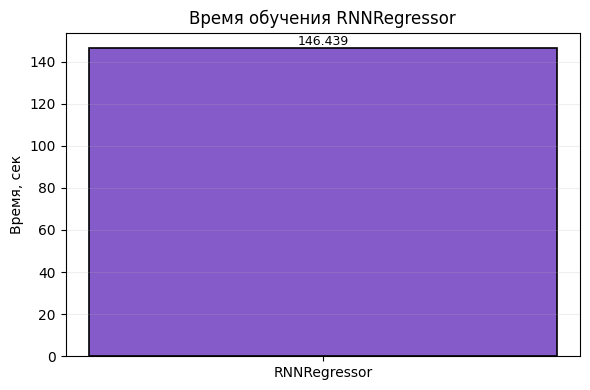

In [ ]:
my_cmap = LinearSegmentedColormap.from_list("my_palette", ["#ffffff", "#9370DB", "#4B0082"])
plt.figure(figsize=(6, 4))
bars = plt.bar(["RNNRegressor"], [train_time],
               color=[my_cmap(0.6)], edgecolor='black', linewidth=1.2)
plt.title("Время обучения RNNRegressor")
plt.ylabel("Время, сек")
plt.grid(axis="y", alpha=0.2)
plt.text(bars[0].get_x() + bars[0].get_width() / 2,
         train_time, f"{train_time:.3f}",
         ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

        Train_RMSE  Test_RMSE  Train_R2   Test_R2  Train_Time
Epochs                                                       
50        1.001399   1.133012  0.833081  0.786847     56.9282
100       0.766951   1.078376  0.902090  0.806909    118.6244
150       0.639712   1.106784  0.931882  0.796602    182.6450


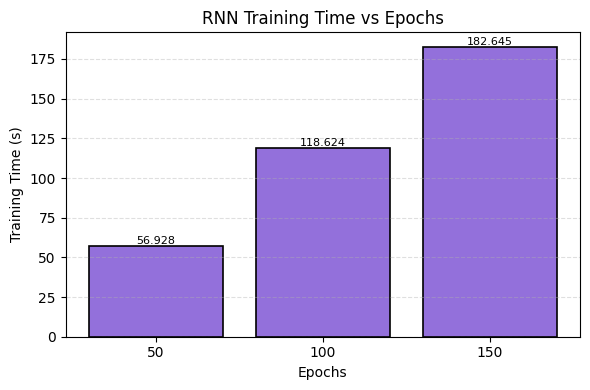

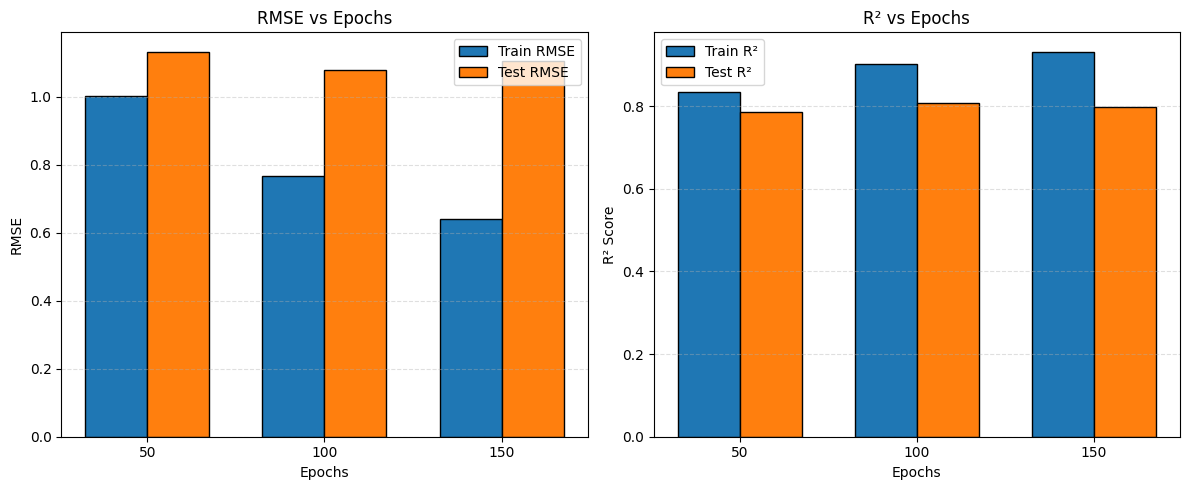

In [ ]:
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    r2_score, median_absolute_error
)
import matplotlib.pyplot as plt

# ПОДГОТОВКА ДАННЫХ
cat_cols = ['day_of_week', 'month', 'year']
target   = 'traf'
num_cols = df.columns.difference(cat_cols + [target])

X_df = df[cat_cols + list(num_cols)].copy()
for c in cat_cols:
    X_df[c] = X_df[c].astype('category').cat.codes

X = X_df.values.astype(np.float32)               # (N, features)
y = df[target].values.astype(np.float32).reshape(-1, 1)

# Превращаем данные в «последовательности» для RNN: (N, seq_len, 1)
X_seq    = torch.from_numpy(X).unsqueeze(-1)
y_tns    = torch.from_numpy(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_tns, test_size=0.2,
    random_state=42, shuffle=True
)
train_ds     = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

class RNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc  = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, (h_n, _) = self.rnn(x)
        return self.fc(h_n[-1])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epoch_list = [50, 100, 150]
records = []

for epochs in epoch_list:
    model     = RNNRegressor(input_size=1, hidden_size=64, num_layers=2).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    t0 = time.perf_counter()
    for _ in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()
    train_time = round(time.perf_counter() - t0, 4)

    model.eval()
    with torch.no_grad():
        pred_tr = model(X_train.to(device)).cpu().numpy()
        pred_te = model(X_test.to(device)).cpu().numpy()

    records.append({
        'Epochs':     epochs,
        'Train_RMSE': np.sqrt(mean_squared_error(y_train.numpy(), pred_tr)),
        'Test_RMSE':  np.sqrt(mean_squared_error(y_test.numpy(),  pred_te)),
        'Train_R2':   r2_score(y_train.numpy(), pred_tr),
        'Test_R2':    r2_score(y_test.numpy(),  pred_te),
        'Train_Time': train_time
    })

df_res = pd.DataFrame(records).set_index('Epochs')
print(df_res)

plt.figure(figsize=(6, 4))
bars = plt.bar(df_res.index.astype(str), df_res['Train_Time'],
               color='#9370DB', edgecolor='black', linewidth=1.2)
plt.title("RNN Training Time vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Time (s)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
for bar, t in zip(bars, df_res['Train_Time']):
    plt.text(bar.get_x() + bar.get_width()/2, t,
             f"{t:.3f}", ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()
x = np.arange(len(df_res))
width = 0.35

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(x - width/2, df_res['Train_RMSE'], width, label='Train RMSE', edgecolor='black')
plt.bar(x + width/2, df_res['Test_RMSE'],  width, label='Test RMSE',  edgecolor='black')
plt.title('RMSE vs Epochs')
plt.xlabel('Epochs'); plt.ylabel('RMSE')
plt.xticks(x, df_res.index.astype(str)); plt.legend(); plt.grid(axis='y', linestyle='--', alpha=0.4)

# R²
plt.subplot(1, 2, 2)
plt.bar(x - width/2, df_res['Train_R2'], width, label='Train R²', edgecolor='black')
plt.bar(x + width/2, df_res['Test_R2'],  width, label='Test R²',  edgecolor='black')
plt.title('R² vs Epochs')
plt.xlabel('Epochs'); plt.ylabel('R² Score')
plt.xticks(x, df_res.index.astype(str)); plt.legend(); plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
